In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


In [26]:
def polynomial_dataframe(feature, output, degree): # feature and output is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    poly_dataframe['output']=output
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature**power
    return poly_dataframe

In [48]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

house_set_4_data = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
house_set_3_data = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
house_set_2_data = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
house_set_1_data = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
house_test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
house_train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
house_valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
for i in [house_set_4_data, house_set_3_data, house_set_2_data, house_set_1_data, house_test_data, house_train_data, house_valid_data]:
    i = i.sort(['sqft_living', 'price'])

/Users/patelpri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/patelpri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [28]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [29]:
poly1_data = polynomial_dataframe(sales['sqft_living'], sales['price'], 1)

In [30]:
from sklearn import linear_model
model1=linear_model.LinearRegression()

In [32]:
print(poly1_data['power_1'].reshape(-1,1).shape)

model1.fit(poly1_data[['power_1']], poly1_data[['output']])

(21613, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
model1.predict(poly1_data[['power_1']])

array([[   37800.09159579],
       [   60249.97702758],
       [   63056.21270656],
       ..., 
       [ 2773879.8785959 ],
       [ 3337933.25006977],
       [ 3756062.36623697]])

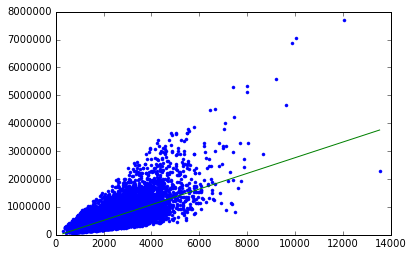

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['output'],'.',
poly1_data['power_1'], model1.predict(poly1_data[['power_1']]),'-')

In [37]:
features=['power_1','power_2']
poly2_data=polynomial_dataframe(sales['sqft_living'],sales['price'],2)

poly2_data.head()

,power_1,output,power_2
19452,290.0,142000.0,84100.0
15381,370.0,276000.0,136900.0
860,380.0,245000.0,144400.0
18379,384.0,265000.0,147456.0
4868,390.0,228000.0,152100.0


In [38]:
model2=linear_model.LinearRegression().fit(poly2_data[features],poly1_data[['output']])

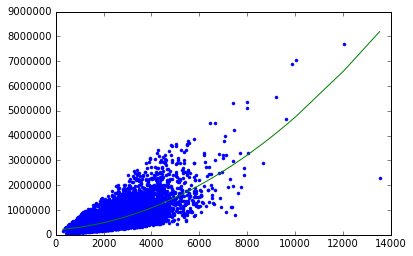

In [39]:
plt.plot(poly1_data['power_1'],poly1_data['output'],'.',
poly1_data['power_1'], model2.predict(poly2_data[features]),'-')

In [45]:
def model_predict(poly, orig_data):
    features = ['power_%d'%(x+1) for x in range(poly)]
    data=polynomial_dataframe(orig_data['sqft_living'],orig_data['price'], poly)
    model=linear_model.LinearRegression()
    model.fit(data[features],data[['output']])
    print(model.coef_)
    plt.plot(data['power_1'],data['output'],'.',
    data['power_1'], model.predict(data[features]),'-')
    return model

[[  4.56404164e-91   1.42711969e-50   1.72756064e-55   0.00000000e+00
    0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
    1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
    1.61618577e-44  -2.49283826e-48   9.59718336e-53]]


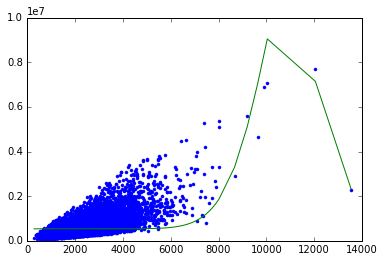

In [46]:
x=model_predict(15, sales)

1
[[  1.37062036e-76  -7.34923934e-40  -1.26052210e-44   9.19265012e-50
    0.00000000e+00   0.00000000e+00   1.27051320e-54   4.87799084e-51
    1.73524691e-47   5.46982653e-44   1.39568452e-40   2.25011155e-37
   -9.43820708e-41   1.31553951e-44  -6.09070614e-49]]


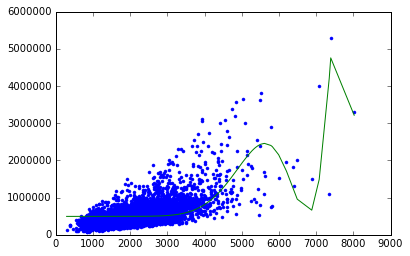

In [57]:
count=1
for h in [house_set_4_data]:#, house_set_3_data, house_set_2_data, house_set_1_data, house_test_data]:
    print(count)
    model_predict(15,h)
    count+=1


In [93]:
def model_predict1(poly, orig_data):
    features = ['power_%d'%(x+1) for x in range(poly)]
    data=polynomial_dataframe(orig_data['sqft_living'],orig_data['price'], poly)
    valid=polynomial_dataframe(house_valid_data['sqft_living'],house_valid_data['price'],poly)
    model=linear_model.LinearRegression()
    model.fit(data[features],data[['output']])
    predict = model.predict(valid[features])
   # print(predict.shape,valid[['output']].shape)
  #  RSS=
    return (poly, ((valid[['output']]-predict)**2).sum()[0], model)
    

In [97]:
models=[]
for x in range(1,15):
    poly, rss, model = model_predict1(x,house_train_data)
    models.append((rss,poly,model))
models.sort()
models[0]

(566268640171663.25,
 6,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

In [102]:
test=polynomial_dataframe(house_test_data['sqft_living'],house_test_data['price'],6)
features = ['power_%d'%(x+1) for x in range(6)]

In [104]:
predict = models[0][2].predict(test[features])

In [105]:
((test[['output']]-predict)**2).sum()[0]

135225112059292.66